In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from flask import Flask, jsonify, request
import joblib


Entrega 1: Análise Exploratória sobre a Transição Energética

In [3]:
import pandas as pd
#Carregar os dados
data = pd.read_csv("data.csv") 
print(data.head())


   Unnamed: 0  year  month uf_acronym   type  number_of_consumers  consumption
0           0  2004      1         RO  total                  NaN    112812.00
1           1  2004      1         AC  total                  NaN     34840.05
2           2  2004      1         AM  total                  NaN    274773.00
3           3  2004      1         RR  total                  NaN     31695.63
4           4  2004      1         PA  total                  NaN   1011353.04


In [4]:
data = pd.read_csv("data.csv") 
# Estatísticas descritivas
print(data.describe())

# Verificar valores nulos
print(data.isnull().sum())


         Unnamed: 0          year         month  number_of_consumers  \
count  34992.000000  34992.000000  34992.000000         2.257500e+04   
mean   17495.500000   2012.500000      6.500000         6.601307e+05   
std    10101.464646      5.188202      3.452102         1.782552e+06   
min        0.000000   2004.000000      1.000000         5.200000e+01   
25%     8747.750000   2008.000000      3.750000         1.878400e+04   
50%    17495.500000   2012.500000      6.500000         1.053190e+05   
75%    26243.250000   2017.000000      9.250000         4.303330e+05   
max    34991.000000   2021.000000     12.000000         1.815018e+07   

        consumption  
count  3.499200e+04  
mean   6.021383e+05  
std    1.198639e+06  
min    3.540000e+02  
25%    8.289975e+04  
50%    2.132150e+05  
75%    5.828797e+05  
max    1.241441e+07  
Unnamed: 0                 0
year                       0
month                      0
uf_acronym                 0
type                       0
number_o

Entrega 2: Gráficos analisando a transição energética

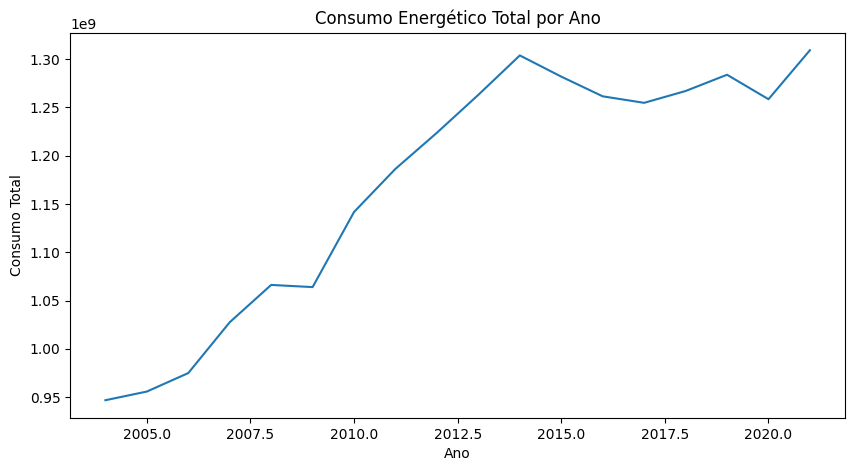

In [18]:
# Agrupar por ano e somar o consumo
yearly_consumption = data.groupby('year')['consumption'].sum()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_consumption.index, y=yearly_consumption.values)
plt.title("Consumo Energético Total por Ano")
plt.xlabel("Ano")
plt.ylabel("Consumo Total")
plt.show()


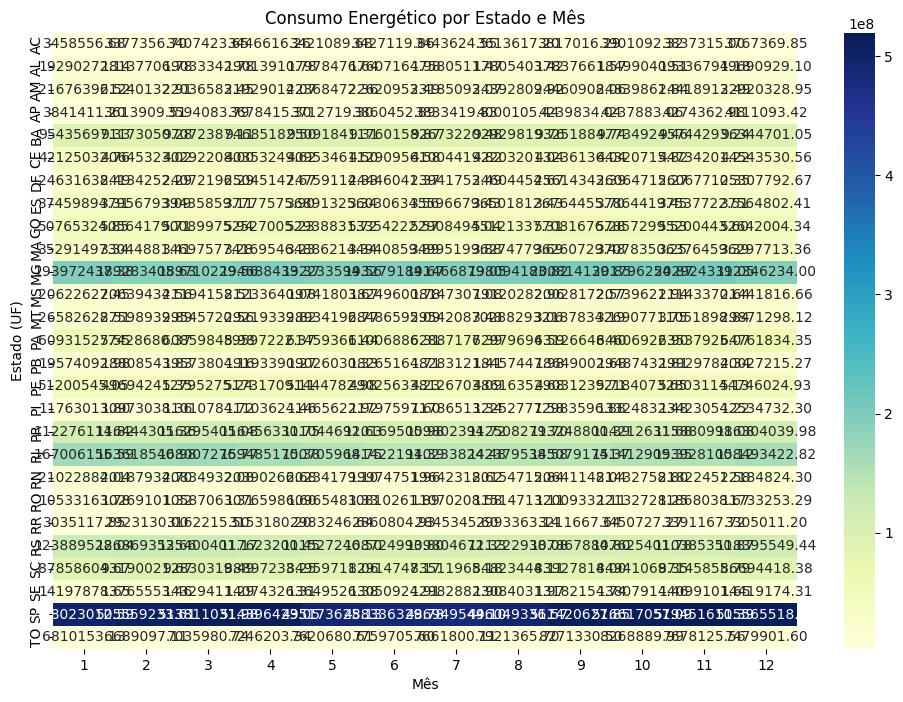

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("data.csv") 
import seaborn as sns 
# Criar uma tabela pivô e arredondar os valores
heatmap_data = data.pivot_table(
    values='consumption', 
    index='uf_acronym', 
    columns='month', 
    aggfunc='sum'
).round(2)  # Arredonda para 2 casas decimais

# Plotar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f")  # fmt ajustado para 2 casas decimais
plt.title("Consumo Energético por Estado e Mês")
plt.xlabel("Mês")
plt.ylabel("Estado (UF)")
plt.show()


Entrega 3: Modelos Preditivos Relacionados à Sustentabilidade

In [6]:
data = pd.read_csv("data.csv") 
from sklearn.model_selection import train_test_split
# Selecionar variáveis independentes e dependente
X = data[['year', 'month', 'number_of_consumers']]
y = data['consumption']

# Dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Instanciar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
data = pd.read_csv("data.csv") 
# Selecionar variáveis para clusterização

X_cluster = data[['number_of_consumers', 'consumption']]

# Instanciar e treinar o modelo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_cluster)

# Plotar os clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='number of consumers', y='consumption', hue='cluster', data=data, palette='viridis')
plt.title("Clusterização de Estados com Base no Consumo e Número de Consumidores")
plt.xlabel("Número de Consumidores")
plt.ylabel("Consumo")
plt.show()


NameError: name 'pd' is not defined

Integração com Flask


In [ ]:
import joblib
joblib.dump(model, 'regression_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')


In [13]:
from flask import Flask, jsonify, request
app = Flask(GifEnergy)

# Rota para previsão de consumo usando o modelo de regressão
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    X_new = [[data['year'], data['month'], data['number of consumers']]]
    prediction = model.predict(X_new)
    return jsonify({'predicted_consumption': prediction[0]})

# Rota para clusterização usando o modelo K-means
@app.route('/cluster', methods=['POST'])
def cluster():
    data = request.get_json()
    X_new = [[data['number of consumers'], data['consumption']]]
    cluster_label = kmeans.predict(X_new)
    return jsonify({'cluster': int(cluster_label[0])})

if __name__ == '__main__':
    app.run(debug=True)


ModuleNotFoundError: No module named 'flask'

Testar o Flask API
1- Inicie o servidor Flask com python app.py.
2- Faça uma requisição POST para a rota /predict para previsão de consumo e para /cluster para clusterização.
